In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 선형 모델

In [3]:
x = np.arange(-5, 5, 0.1)

In [4]:
x.shape

(100,)

In [5]:
잡음 = np.random.randn(len(x))
y = x + 잡음

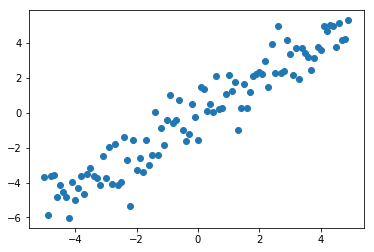

In [6]:
plt.scatter(x, y)

### 1960 선형회귀

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

지도학습용 데이터 준비

In [9]:
X = x.reshape(len(x), 1)
X.shape

(100, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

모델 훈련

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

모델의 학습 매개변수 (학습 후)

In [13]:
w = model.coef_
b = model.intercept_
print(w, b)

[ 1.04020176] -0.0918002583507


In [14]:
y_train_pred = w[0]*X_train.flatten() + b
y_test_pred = w[0]*X_test.flatten() + b

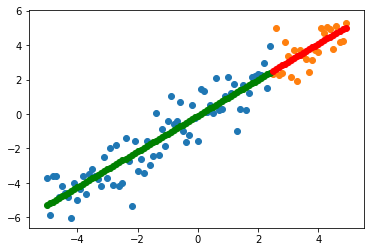

In [15]:
plt.scatter(X_train.flatten(), y_train)
plt.scatter(X_test.flatten(), y_test)
plt.scatter(X_train.flatten(), y_train_pred, color='g')
plt.scatter(X_test.flatten(), y_test_pred, color='r')

In [16]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.83712838666904854, 0.35990785541547021)

In [17]:
boston = pd.read_csv('data/boston.csv')

In [18]:
y = boston.values[:, 0].astype('float32')
X = boston.values[:, 1:].astype('float32')

In [19]:
X.shape, y.shape

((506, 13), (506,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
model = LinearRegression().fit(X_train, y_train)

In [22]:
w = model.coef_
b = model.intercept_

In [23]:
w.shape

(13,)

In [24]:
w[:3]

array([-0.14662774,  0.05463072, -0.04834371], dtype=float32)

In [25]:
b

40.820889

Q: "가중치와 특성과의 관계?"  
A: 의미를 부여하기 어렵습니다.

In [26]:
특성명 = boston.columns[1:]

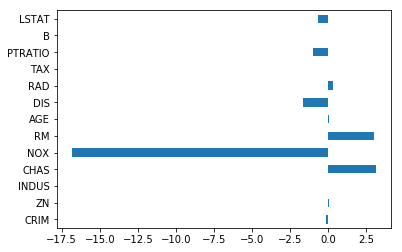

In [27]:
pd.Series(w, index=특성명).plot(kind='barh')

In [28]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.74976007901429564, 0.6674192544219083)

특성 공학으로 특성 차원을 강제로 확대

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree=2)

In [31]:
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [32]:
XX_train = poly.transform(X_train)
XX_test = poly.transform(X_test)

In [33]:
X_train.shape, XX_train.shape

((379, 13), (379, 105))

In [34]:
model = LinearRegression().fit(XX_train, y_train)
model.score(XX_train, y_train), model.score(XX_test, y_test)

(0.70739698478097213, 0.19671864410180429)

릿지 회귀: 선형 회귀인데, 표현력 조정이 가능한 모델

In [35]:
from sklearn.linear_model import Ridge

alpha 값에 따른 학습 매개변수 변화 수집

In [36]:
alpha_range = [0.001, 0.01, 0.1, 1.0, 10., 100., 1000.]
가중치_변화 = {}
훈련결과 = {}
for alpha in alpha_range:
    ridge = Ridge(alpha=alpha).fit(XX_train, y_train)
    w = ridge.coef_
    가중치_변화[alpha] = w
    훈련점수 = ridge.score(XX_train, y_train)
    시험점수 = ridge.score(XX_test, y_test)
    훈련결과[alpha] = {'train': 훈련점수, 'test': 시험점수}

C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.659677005884987e-10
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.9040526367273287e-10
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.8897687848482576e-10
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

In [37]:
훈련결과표 = pd.DataFrame(훈련결과).T

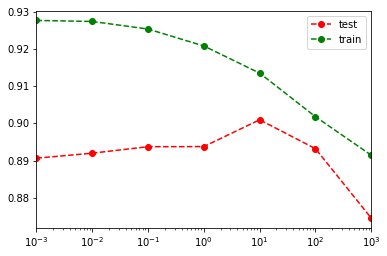

In [38]:
style = {'train': 'go--', 'test': 'ro--'}
훈련결과표.plot(style=style, logx=True)

In [39]:
가중치_벡터_크기 = {}
for alpha, w in 가중치_변화.items():
    가중치_벡터_크기[alpha] = np.sum(w**2)

In [40]:
가중치_벡터_크기

{0.001: 5422.5127,
 0.01: 2726.7031,
 0.1: 650.49109,
 1.0: 103.37676,
 10.0: 16.524366,
 100.0: 1.5130776,
 1000.0: 0.16478679}

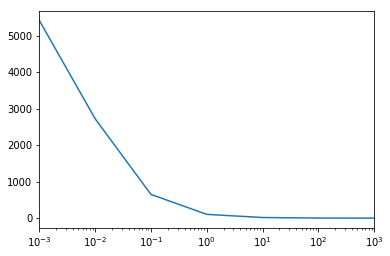

In [41]:
pd.Series(가중치_벡터_크기).plot(logx=True)

In [42]:
w_alpha_0001= 가중치_변화[0.001]

In [43]:
w_alpha_1000 = 가중치_변화[1000]

(-1, 1)

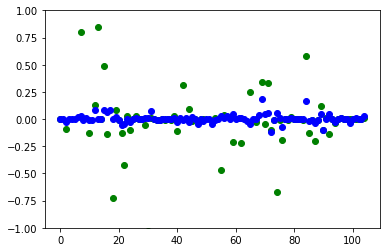

In [44]:
plt.plot(w_alpha_0001, 'go')
plt.plot(w_alpha_1000, 'bo')
plt.ylim(-1, 1)

선형 분류

1. 퍼셉트론
1. 로지스틱 회귀

In [45]:
from sklearn.linear_model import Perceptron, LogisticRegression

In [46]:
cancer = pd.read_csv('data/cancer.csv')

In [47]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

1958 퍼셉트론: 최초의 학습 알고리즘.

In [48]:
perceptron = Perceptron(max_iter=10).fit(X_train, y_train)
perceptron.score(X_train, y_train), perceptron.score(X_test, y_test)

(0.89436619718309862, 0.91608391608391604)

1961 로지스틱 "회귀": 퍼셉트론의 개선.

In [49]:
logreg = LogisticRegression(C=1.0).fit(X_train, y_train)

In [50]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.95539906103286387, 0.95104895104895104)

In [51]:
예측확률 = logreg.predict_proba(X_test)

In [52]:
pd.DataFrame(예측확률, columns=['악성', '양성']).sample(5)

,악성,양성
128,0.993909,0.006091
63,0.989001,0.010999
131,0.999468,0.000532
104,0.956010,0.043990
23,0.999118,0.000882


로지스틱 회귀 모델 튜닝

In [53]:
C_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]
훈련결과 = {}
for C in C_range:
    logreg = LogisticRegression(C=C).fit(X_train, y_train)
    훈련점수 = logreg.score(X_train, y_train)
    시험점수 = logreg.score(X_test, y_test)
    훈련결과[C] = {'train': 훈련점수, 'test': 시험점수}

In [54]:
훈련결과표 = pd.DataFrame(훈련결과).T

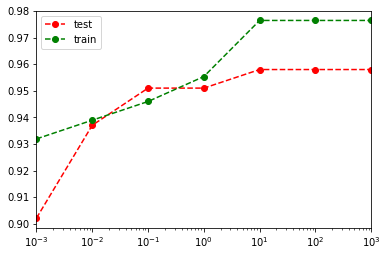

In [55]:
훈련결과표.plot(style=style, logx=True)

## 1985 결정트리

비선형적 데이터도 문제 없습니다.

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X , y)

In [58]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.93706293706293708)

형성된 결정 트리의 최대 깊이

In [59]:
tree.tree_.max_depth

7

최대 깊이 제한으로 과적합 개선 시도

In [60]:
tree_d4 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
tree_d4.score(X_train, y_train), tree_d4.score(X_test, y_test)

(0.98826291079812212, 0.93006993006993011)

In [61]:
tree_d4.tree_.max_depth

4

결정 트리 시각화

결정 트리 군의 모델이 널리 사랑받는 이유 중 하나이기도 합니다.

In [62]:
from sklearn.tree import export_graphviz

In [63]:
export_graphviz(tree_d4, out_file='tree.dot', class_names=['M', 'B'])

그래프로 만들기

In [64]:
import graphviz

In [65]:
with open('tree.dot') as 파일:
    dot_graph = 파일.read()

In [66]:
dot = graphviz.Source(dot_graph)

In [67]:
dot.format='png'
dot.render(filename='tree')

ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'tree'], make sure the Graphviz executables are on your systems' PATH

In [68]:
특성중요도 = tree.feature_importances_
특성명 = cancer.columns[1:]
특성중요도 = pd.Series(특성중요도, index=특성명)

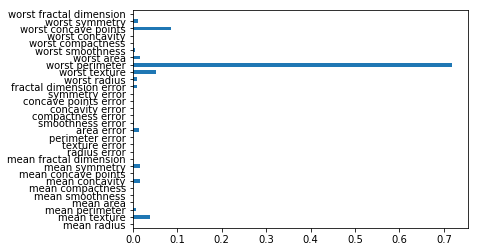

In [71]:
특성중요도.plot(kind='barh')